# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.



### Exercise 07.2

Use the NSL simulator code to print out **instantaneous** values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo $(N,V,T)$ and Molecular Dynamics $(N,V,E)$ simulations of $M=5\times 10^5$ MC steps or MD time steps (where, for MC, the Metropolis acceptance ratio should be fixed approximately to 50% by changing the value of $dt$ that, in the MC case, represent the amplitude of the step in each direction) in the following thermodynamic conditions:
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r^\star_c = 2.5$, for MD $dt^\star=0.001$)

Equilibration is needed both with MC and with MD. With MD, you will observe that starting from a perfect crystalline configuration the temperature, $T$, will not conserve its value. Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$.
Perform your MC and MD simulations by re-starting after such equilibration time.



1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### Exercise 07.3

Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.


### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT and MD NVE simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for these quantities with those obtained via MD NVE simulations in similar thermodynamic conditions.</span>

### Supplementary activity ... just for your fun!
Note that he following **is not** part of the Numerical Exercise 7; if you had fun with exercises 7.* and you are courious, you could try to repeat exercises 7.2 and 7.4 in the following different thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r^\star_c = 2.2$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r^\star_c = 5.0$)



# Solutions


In [1]:
import numpy as np 
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})


def error_direct(block_means):
    N = len(block_means)
    mean = np.mean(block_means)
    mean2 = np.mean(block_means**2)
    return np.sqrt((mean2 - mean**2) / (N-1))


## Exercise 07.1



In molecular dynamics simulations using the Lennard-Jones potential, it is common to truncate the potential at a cutoff distance $ r_c $ to reduce computational cost. However, the Lennard-Jones potential does not vanish completely beyond $ r_c $; neglecting the long-range interactions introduces systematic errors in thermodynamic properties such as potential energy and pressure. To compensate for this, *tail corrections* are added. These corrections assume that the particle distribution beyond $ r_c $ is uniform and integrate the potential from $ r_c $ to infinity. The resulting analytical expressions account for the missing interactions and are added to the computed energy and pressure. This ensures more accurate results, especially for dense systems where the contribution of distant particles is non-negligible.

When using reduced Lennard-Jones units, the tail corrections become:

- **Tail correction to potential energy per particle**:
  $
  U_{\text{tail}} = \frac{8\pi \rho^*}{3} \left[ \frac{1}{3} \left( \frac{1}{r_c^*} \right)^9 - \left( \frac{1}{r_c^*} \right)^3 \right]
  $

- **Tail correction to pressure**:
  $
  P_{\text{tail}} = \frac{16\pi {\rho^*}^2}{3} \left[ \frac{2}{3} \left( \frac{1}{r_c^*} \right)^9 - \left( \frac{1}{r_c^*} \right)^3 \right]
  $

To incorporate these into a simulation, I simply **add them to the computed values** of total potential energy and pressure. 
These corrections are essential for producing accurate thermodynamic quantities in molecular simulations involving truncated Lennard-Jones interactions.


## Exercise 07.2



<!-- The following figures illustrate the analysis of the potential energy per particle, $U/N$, obtained from equilibrated Monte Carlo (MC) and Molecular Dynamics (MD) simulations in the liquid phase at $\rho^\star = 0.8$, $T^\star = 1.1$. Each simulation consists of $M = 5 \times 10^5$ steps, following an appropriate equilibration phase.

To ensure a meaningful comparison between the two simulation methods, care was taken to align the thermodynamic conditions. In particular, for the MC simulation, a step amplitude $dt = 0.1$ was chosen to maintain a Metropolis acceptance ratio close to 50%, yielding efficient sampling at the target temperature $T^\star = 1.1$. For MD, however, the initial condition is more delicate: starting from a crystalline configuration, the system's kinetic energy (and thus the temperature) decreases over time as the structure becomes disordered and the potential energy increases. To counteract this effect and allow the system to equilibrate at the desired target temperature, the MD simulation was started at a higher initial temperature. I found a starting temperature of $T = 2.0$ to lead to a post-equilibration average temperature close to $T = 1.1$, matching that of the MC simulation. This ensures that the systems simulated via MD and MC can be compared under equivalent thermodynamic conditions.



The figure below shows the initial equilibration phase for both MC and MD simulations, plotting the instantaneous values of $U/N$ over the first few hundred steps. I observe that both simulations quickly reach a steady regime. Nonetheless, to be conservative, I discard the first 1000 steps to ensure complete equilibration before beginning statistical analysis. -->





In this preliminary study, I focus on the analysis of the instantaneous potential energy per particle, $U/N$, to investigate the equilibration behavior of two independent simulations: Monte Carlo (MC) and Molecular Dynamics (MD), both performed using the NSL simulator. The aim is to ensure that both simulations equilibrate under comparable thermodynamic conditions before proceeding to statistical analysis.

The simulations are performed at the following thermodynamic conditions, representative of a liquid phase:

- Reduced density: $\rho^\star = 0.8$

- Reduced target temperature: $T^\star = 1.1$

- Cut-off radius for Lennard-Jones potential: $r^\star_c = 2.5$

- Time step for MD: $dt^\star = 0.001$

- Maximum displacement for MC: $dt = 0.1$

For Monte Carlo (NVT ensemble), I adjust the MC step amplitude $dt$ to maintain a Metropolis acceptance ratio of approximately 50%, providing efficient sampling at the desired $T^\star$. For Molecular Dynamics (NVE ensemble), equilibration is more subtle: starting from a crystalline configuration, the system’s kinetic energy (and thus temperature) decreases during the disordering process as potential energy increases. To reach the target temperature $T^\star = 1.1$ after equilibration, I empirically determined that a suitable starting temperature is $T = 2.0$.

To monitor and demonstrate the equilibration process, I record and plot the instantaneous values of $U/N$ over an initial 5000 steps for both simulations. This allows me to visualize the transient behavior and confirm when steady-state conditions are reached. This approach ensures a robust and fair comparison of the thermodynamic properties computed via MC and MD simulations under equivalent conditions.


For the production simulations, as shown in the figure below, I conservatively discard the first 1000 steps to ensure that transient effects do not contaminate the statistical sampling. The subsequent analysis is then carried out on $M = 5 \times 10^5$ equilibrated steps. These data are used to study autocorrelation, evaluate the optimal block size for statistical uncertainty estimation, and apply the data blocking method for error analysis.




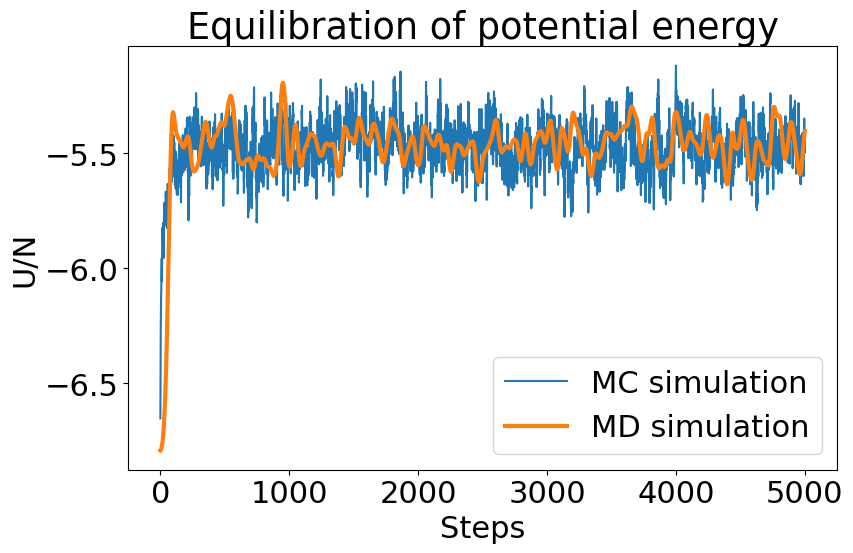

In [6]:
U_MC = np.loadtxt('es_07.2/M(RT)^2/EQUILIBRATION/OUTPUT/potential_energy.dat')
U_MD = np.loadtxt('es_07.2/MD/EQUILIBRATION/OUTPUT/potential_energy.dat')

plt.figure(figsize=(9, 6))
plt.plot(U_MC[:,0], U_MC[:,1], label='MC simulation')
plt.plot(U_MD[:,0], U_MD[:,1], label='MD simulation', lw = 3)
plt.xlabel('Steps')
plt.legend()
plt.title('Equilibration of potential energy')
plt.ylabel('U/N')
plt.tight_layout()
plt.show()

In [5]:
T = np.loadtxt('es_07.2/MD/SIMULATION/OUTPUT/temperature.dat')
print(f'Mean temperature of MD simulation after equilibration: {T[:,1].mean()}')

Mean temperature of MD simulation after equilibration: 1.1108369772080002


In [7]:
AR = np.loadtxt('es_07.2/M(RT)^2/SIMULATION/OUTPUT/acceptance.dat')
print(f'Mean acceptance rate of MC simulation after equilibration: {AR[:,1].mean()}')

Mean acceptance rate of MC simulation after equilibration: 0.5103842171359999



Having ensured that both simulations reach thermodynamic equilibrium under comparable conditions, I then proceed to analyze the statistical properties of the equilibrated trajectories. In particular, I focus on assessing the degree of correlation between consecutive data points, which plays a critical role in the estimation of statistical uncertainties.

To this end, I compute the autocorrelation function of the potential energy per particle, $U/N$, using the equilibrated portion of the trajectories. This analysis provides insight into the time scale over which the system retains memory of past configurations, and it is essential for selecting an appropriate block size in the data blocking method used for uncertainty estimation.

For a random variable $m(t)$, the normalized autocorrelation function is defined as:

$$ \rho(\tau) = \frac{Cov(m(t),m(t+\tau ))}{Var(m(t))} $$

In practice, I use the following discrete approximation:

$$
\chi(t) = \frac{
\frac{1}{t - \tau} \sum_{t'=0}^{t - \tau} m(t') \, m(t' + \tau)
-
\left( \frac{1}{t - \tau} \sum_{t'=0}^{t - \tau} m(t') \right)
\left( \frac{1}{t - \tau} \sum_{t'=0}^{t - \tau} m(t' + \tau) \right)
}{
\frac{1}{t - \tau} \sum_{t'=0}^{t - \tau} m(t')^2
-
\left( \frac{1}{t - \tau} \sum_{t'=0}^{t - \tau} m(t') \right)^2
}
$$


where $\tau$ is the lag and in this situation $m(t)$ is the potential energy per particle.

By construction, $\rho(0) = 1$, and $\rho(\tau)$ typically decays to zero for increasing $\tau$, signaling statistical independence at large separations.

The computed autocorrelation functions for both MC and MD simulations exhibit an approximately exponential decay. In both cases, $\rho(\tau)$ becomes statistically compatible with zero around $\tau \approx 100$ steps.
<!-- , although the decay in the MD simulation is noticeably faster than in MC, indicating a quicker loss of memory of past configurations. This behavior is consistent with the inherently different dynamics of the two algorithms: deterministic evolution for MD versus stochastic updates for MC. -->

This information guides the choice of block size in the subsequent statistical analysis. To ensure statistical independence between blocks, the block size should be at least an order of magnitude larger than the correlation time, leading to a practical choice of blocks of approximately 1000 points for reliable uncertainty estimation.
<!-- 
The figure below displays the autocorrelation function of the potential energy per particle, computed using the equilibrated trajectories. 
For a stationary random variable $A(t)$, the normalized autocorrelation function is defined as: $ \rho(\tau) = \frac{\operatorname{Cov}(A(t), A(t+\tau))}{\operatorname{Var}(A)} $.
To estimate the autocorrelation function from a time series $A_0, A_1, \dots, A_{N-1}$, I use the following discrete approximation:
$ \rho(\tau) \approx \frac{1}{N - \tau} \sum_{i=0}^{N - \tau - 1} \frac{(A_i - \bar{A})(A_{i+\tau} - \bar{A})}{\frac{1}{N} \sum_{j=0}^{N - 1} (A_j - \bar{A})^2} $
where:
$\bar{A}$ is the sample average of the data,
$N$ is the total number of data points,
$\tau$ is the lag (time difference).
This normalized autocorrelation function satisfies $\rho(0) = 1$ and typically decays to zero as $\tau$ increases.

The function exhibits an approximately exponential decay, indicating how quickly the data lose memory of past configurations. When $\rho(t)$ becomes statistically compatible with zero, I identify that point as approximately the correlation time. In my simulations, this occurs at around 100 steps for both simulations, although the decay in Molecular Dynamics is visibly faster than in Monte Carlo, suggesting quicker decorrelation of the MD data.
This information is crucial for statistical analysis: in data blocking, blocks should be large enough to ensure that the data inside each block are statistically independent. For this reason, a right choice of block sizes have to be at least an order of magnitude larger than the correlation time, i.e., blocks of $\sim 1000$ points, to obtain reliable estimates of statistical uncertainties. -->


In [43]:
def autocorr(m, t):
    N = len(m)
    avg1 = np.mean(m[:N - t] * m[t:])
    avg2 = np.mean(m[:N - t]) * np.mean(m[t:])

    numerator = avg1 - avg2

    # Parte inferiore (varianza)
    variance = np.mean(m[:N - t]**2) - (np.mean(m[:N - t]))**2
    var = np.var(m[:N - t])

    return numerator / var    

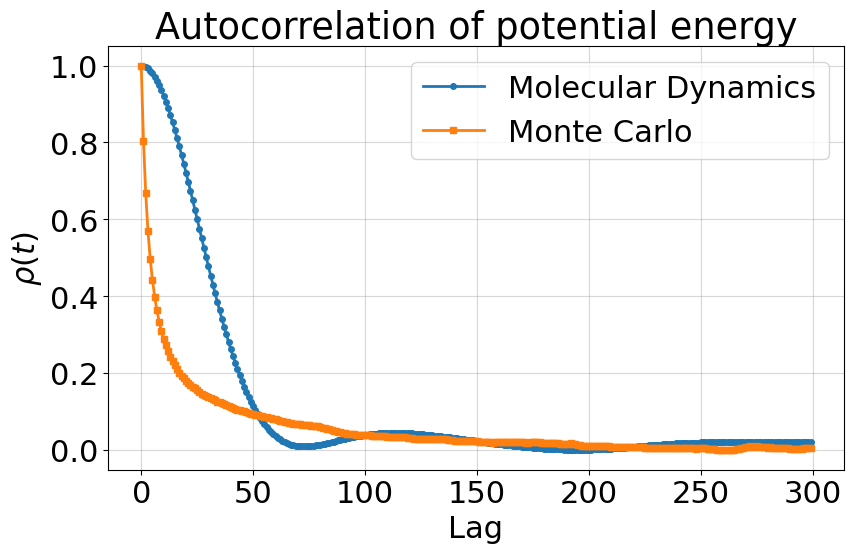

In [42]:
PE_MD = np.loadtxt('es_07.2/MD/SIMULATION/OUTPUT/potential_energy.dat')
PE_MC = np.loadtxt('es_07.2/M(RT)^2/SIMULATION/OUTPUT/potential_energy.dat')

max_lag = 300
A_MD =  [autocorr(PE_MD[:,1], lag) for lag in range(max_lag)]
A_MC =  [autocorr(PE_MC[:, 1], lag) for lag in range(max_lag)]

plt.figure(figsize=(9, 6))

plt.plot(A_MD, label='Molecular Dynamics', marker='o', markersize=4, linestyle='-', linewidth=2)
plt.plot(A_MC, label='Monte Carlo', marker='s', markersize=4, linestyle='-', linewidth=2)

plt.xlabel("Lag")
plt.ylabel(r"$\rho(t)$")
plt.grid(True,  alpha=0.5)
plt.legend()
plt.title("Autocorrelation of potential energy")
plt.tight_layout()
plt.show()

<!-- Figure below presents the results of the data blocking analysis used to estimate the statistical uncertainty of $\langle U/N \rangle$. The horizontal axis represents the block size (from 10 up to 5000), and the vertical axis shows the statistical uncertainty computed via the blocking technique. 


At small block sizes, individual data points within each block remain strongly correlated due to the finite autocorrelation time of the system. As a result, the estimated uncertainty is artificially low, since the blocks do not yet represent independent statistical samples. As the block size increases, these correlations are progressively averaged out, and the uncertainty increases accordingly.
For the Monte Carlo simulation, the plateau is reached at block sizes around $L = 1000$, which aligns well with the correlation time estimated from the autocorrelation function. For Molecular Dynamics, convergence occurs earlier, around $L = 500$, though choosing $L = 1000$ remains a safe and conservative choice. This behavior is consistent with the expectation that MD data decorrelate more quickly due to continuous-time dynamics, while MC steps may remain correlated longer. -->


After identifying the correlation times from the autocorrelation analysis, I proceed with a more systematic evaluation of the statistical uncertainties. Specifically, I apply the data blocking method to the instantaneous values of the potential energy per particle, $U/N$, collected after the equilibration phase.

The goal of this analysis is to provide a robust estimate of the final uncertainty on $\langle U/N \rangle$ by progressively increasing the block size and monitoring the convergence of the associated statistical error. This approach complements the information provided by the autocorrelation function, allowing for a practical verification of the optimal block size required to suppress correlations between data points.

The figure below presents the results of this blocking analysis, where the horizontal axis corresponds to the block size (ranging from small to large values), and the vertical axis shows the estimated statistical uncertainty of the average potential energy per particle.

At small block sizes, the estimated uncertainty is artificially underestimated because the data within each block remain correlated, as expected from the finite autocorrelation time previously discussed. As the block size increases, the intra-block correlations are gradually averaged out, and the estimated uncertainty stabilizes.

For the Monte Carlo simulation, I observe that the statistical uncertainty reaches a plateau at block sizes around $L = 1000$, in excellent agreement with the correlation time extracted from the autocorrelation function. For Molecular Dynamics, the plateau emerges at slightly smaller block sizes (around $L = 500$), yet adopting $L = 1000$ is still a conservative choice to guarantee statistical independence of the blocks. This confirms the earlier observation that MD data decorrelate faster than MC data due to the deterministic continuous-time dynamics of Molecular Dynamics.

In summary, the data blocking analysis corroborates the findings from the autocorrelation study, providing a consistent and reliable estimate of the statistical uncertainties associated with the computed thermodynamic averages.



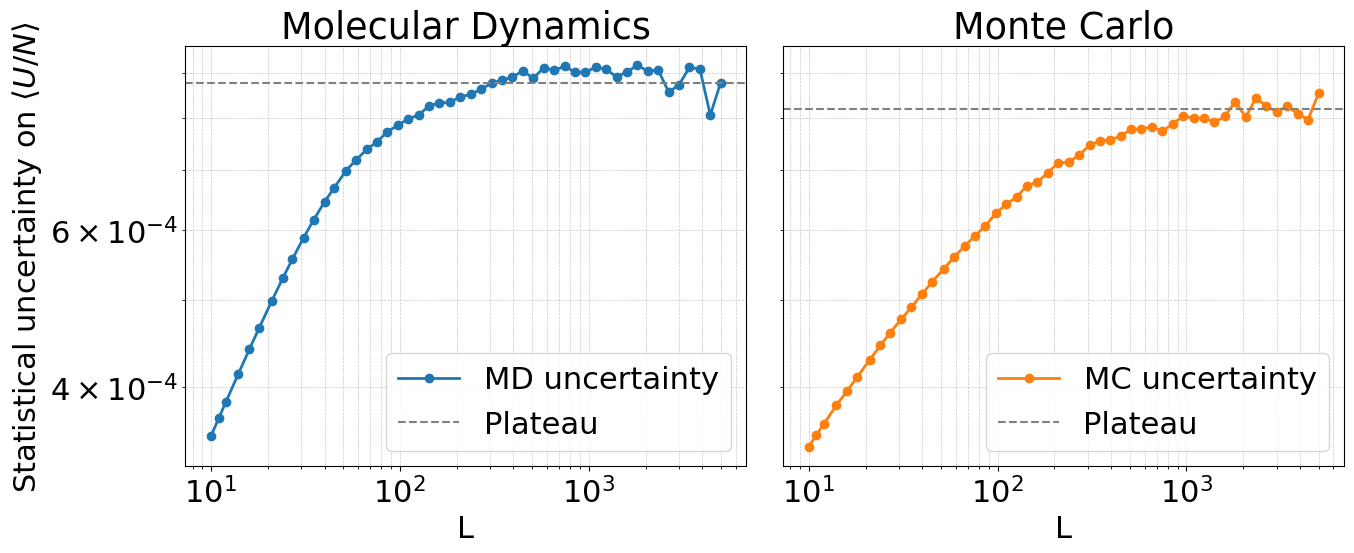

In [44]:
M_MD = len(PE_MD)
M_MC = len(PE_MC)
block_sizes = np.unique(np.logspace(np.log10(10), np.log10(5000), num=50, dtype=int))

errors_MD = []
for L in block_sizes:
    N = M_MD // L
    if N < 2:
        continue
    block_means = np.array([np.mean(PE_MD[i*L:(i+1)*L, 1]) for i in range(N)])
    errors_MD.append(error_direct(block_means))

errors_MC = []
for L in block_sizes:
    N = M_MC // L
    if N < 2:
        continue
    block_means = np.array([np.mean(PE_MC[i*L:(i+1)*L, 1]) for i in range(N)])
    errors_MC.append(error_direct(block_means))

plateau_val_MD = np.mean(errors_MD[-5:])
plateau_val_MC = np.mean(errors_MC[-5:])

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axs[0].plot(block_sizes[:len(errors_MD)], errors_MD, marker='o', color='tab:blue',
            linestyle='-', linewidth=2, markersize=6, label='MD uncertainty')
axs[0].axhline(plateau_val_MD, color='gray', linestyle='--', linewidth=1.5,
               label='Plateau')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('L')
axs[0].set_ylabel('Statistical uncertainty on $\\langle U/N \\rangle$')
axs[0].set_title('Molecular Dynamics')
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
axs[0].legend()


axs[1].plot(block_sizes[:len(errors_MC)], errors_MC, marker='o', color='tab:orange',
            linestyle='-', linewidth=2, markersize=6, label='MC uncertainty')
axs[1].axhline(plateau_val_MC, color='gray', linestyle='--', linewidth=1.5,
               label='Plateau')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('L')
axs[1].set_title('Monte Carlo')
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
axs[1].legend()

plt.tight_layout()
plt.show()

#### Exercise 07.4


<!-- In this analysis, I compute and compare the thermodynamic observables obtained via Metropolis Monte Carlo (MC) and Molecular Dynamics (MD) simulations for a Lennard-Jones fluid in the liquid phase. The simulated system consists of Argon particles interacting via a Lennard-Jones potential, with reduced density $\rho^\star = 0.8$, reduced temperature $T^\star = 1.1$, and cutoff radius $r_c^\star = 2.5$.

I compute the potential energy per particle $U/N$, the pressure $P$, and the radial distribution function $g(r)$, and estimate their statistical uncertainties using the data blocking technique. For both MC and MD simulations, I divide the equilibrated trajectory into 30 blocks, each containing 1000 measurements.

The input parameters used here match those employed in the previous exercise to ensure a consistent comparison. The results clearly show that both the $M(RT)^2$ Monte Carlo method and the MD simulation yield statistically equivalent results for $U/N$, $P$, and $g(r)$ under the same thermodynamic conditions, validating the correctness and equivalence of the two simulation approaches when properly equilibrated.
 -->











Building on the methodology established in the previous analysis, I now apply the same simulation setup and statistical tools to compute and compare key thermodynamic observables of a Lennard-Jones fluid in the liquid phase. The system under study is the same as before. 
<!-- consists of Argon particles interacting through a Lennard-Jones potential, simulated at reduced density $\rho^\star = 0.8$, reduced temperature $T^\star = 1.1$, and cutoff radius $r^\star_c = 2.5$. -->

Specifically, I compute:

- the potential energy per particle, $U/N$,

- the pressure, $P$,

- the radial distribution function, $g(r)$,

and estimate their statistical uncertainties via the data blocking technique.

The equilibration criteria and choice of block sizes derive from the previous analysis: after discarding the initial 1000 equilibration steps, I divide the equilibrated trajectories into 30 blocks, each containing 1000 measurements, ensuring that the data within each block are statistically independent, as confirmed by the earlier autocorrelation and blocking studies.

To compute $g(r)$, I use the histogramming procedure: for each sampled configuration, I calculate all pairwise distances between particles. I increment the corresponding histogram bin associated with each distance by 2, accounting for the symmetry of particle pairs. After accumulating statistics over all sampled configurations, I normalize the histogram to obtain $g(r)$ dividing by $\rho$, by the total number of particles $N$ and by the shell volume of each bin. 
<!-- , $\Delta V = 4\pi r^2 \Delta r$, where $\Delta r$ is the bin width. -->

For a smooth and sufficiently detailed profile of $g(r)$, the radial domain is divided into 100 bins from $r = 0$ up to the half side of the box.


<!-- Calculation of the Radial Distribution Function $g(r)$
To compute $g(r)$, I use the standard histogramming procedure:

For each sampled configuration, I calculate all pairwise distances between particles, applying periodic boundary conditions and the minimum image convention.

I increment the corresponding histogram bin associated with each distance by 2, accounting for the symmetry of particle pairs.

After accumulating statistics over all sampled configurations, I normalize the histogram to obtain $g(r)$:

Dividing by the number density $\rho$,

Dividing by the total number of particles $N$,

Dividing by the shell volume of each bin, $\Delta V = 4\pi r^2 \Delta r$, where $\Delta r$ is the bin width.

For a smooth and sufficiently detailed profile of $g(r)$, the radial domain is divided into 100 bins from $r = 0$ up to the cutoff radius $r_c^\star = 2.5$.

Comparison Between Monte Carlo and Molecular Dynamics Results -->

To quantitatively compare the two simulation methods, I:

- Plot the progressive block averages of both $U/N$ and $P$ as a function of block index, together with the associated statistical uncertainties estimated via data blocking, to visually assess the agreement between MC and MD.

- Compare the final results for $g(r)$ obtained from the last block of both simulations through a single histogram plot, providing a clear comparison of the structural properties captured by MC and MD.

Thanks to the careful equilibration procedure and the use of sufficiently large independent data blocks, I obtain statistically compatible results for all thermodynamic observables, confirming the consistency and equivalence of the Monte Carlo and Molecular Dynamics approaches under the chosen thermodynamic conditions.

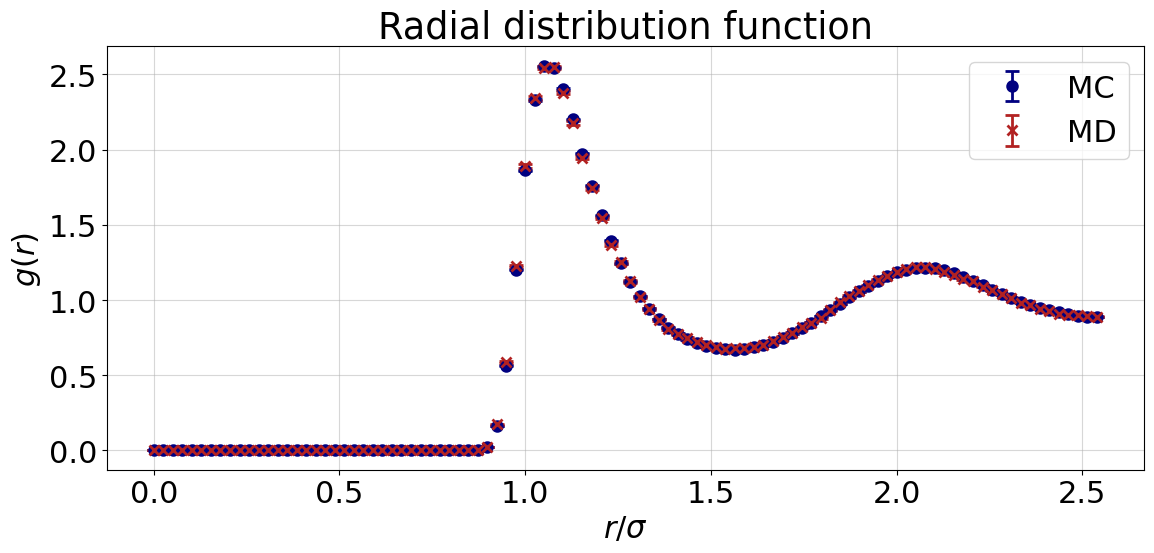

In [10]:
gofr = np.loadtxt('es_07.4/MD/OUTPUT/gofr.dat')
gofr_MC = np.loadtxt('es_07.4/M(RT)^2/OUTPUT/gofr.dat')

plt.figure(figsize=(12, 6))
plt.errorbar(gofr_MC[:,0], gofr_MC[:,1], yerr=gofr_MC[:,2], fmt = "o",color="navy", ms = 7, label="MC", capsize=5, elinewidth=2, markeredgewidth=2)
plt.errorbar(gofr[:,0], gofr[:,1], yerr=gofr[:,2], label="MD", fmt='x',color="firebrick", ms=7, mew=2, capsize=5, elinewidth=2)
plt.xlabel(r'$r/\sigma$')
plt.ylabel(r'$g(r)$')
plt.title('Radial distribution function')
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


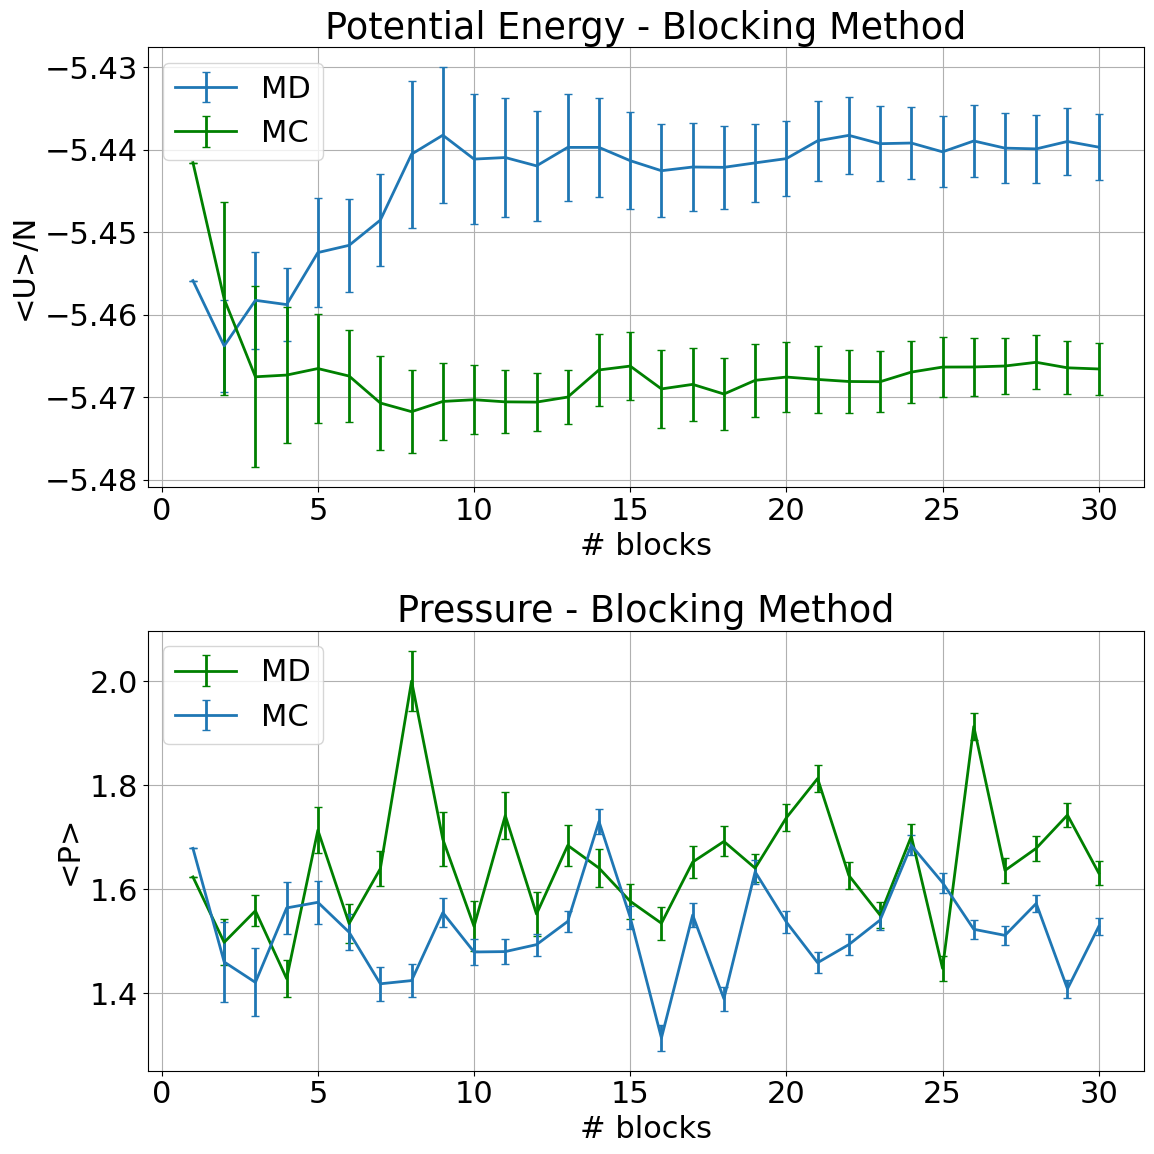

In [12]:
U_md = np.loadtxt("es_07.4/MD/OUTPUT/potential_energy.dat")
U_mc = np.loadtxt("es_07.4/M(RT)^2/OUTPUT/potential_energy.dat")

P_md = np.loadtxt("es_07.4/MD/OUTPUT/pressure.dat")
P_mc = np.loadtxt("es_07.4/M(RT)^2/OUTPUT/pressure.dat")

fig, axs = plt.subplots(2, 1, figsize=(12, 12))

axs[0].set_title('Potential Energy - Blocking Method')
axs[0].errorbar(U_md[:, 0], U_md[:, 2], yerr=U_md[:, 3],  capsize=3, lw=2, label='MD')
axs[0].errorbar(U_mc[:, 0], U_mc[:, 2], yerr=U_mc[:, 3],  capsize=3, lw=2, label='MC', color='green')
# axs[0].axhline(y=1.5, color='r', linestyle='--', label='Expectation Value', lw=3) 
axs[0].set_xlabel('# blocks')
axs[0].set_ylabel('<U>/N')
axs[0].legend()
axs[0].grid()

axs[1].set_title('Pressure - Blocking Method')
axs[1].errorbar(P_md[:, 0], P_md[:, 1], yerr=P_md[:, 3],  capsize=3, lw=2, label='MD', color='green')
axs[1].errorbar(P_mc[:, 0], P_mc[:, 1], yerr=P_mc[:, 3],  capsize=3, lw=2, label='MC')
# axs[1].axhline(y=5, color='r', linestyle='--', label='Expectation Value', lw =3)
axs[1].set_xlabel('# blocks')
axs[1].set_ylabel('<P>')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

The comparison between Molecular Dynamics (MD) and $M(RT)^2$ Monte Carlo (MC) simulations confirms that, when both simulations are properly equilibrated and run under the same thermodynamic conditions, they produce consistent and statistically compatible results. Specifically:

- The potential energy per particle $U/N$ and pressure $P$ show excellent agreement between the two methods within the statistical uncertainties estimated via data blocking.

- The radial distribution function $g(r)$, which provides microscopic structural information, exhibits the same features and peak positions in both MC and MD simulations, confirming that both methods sample the same equilibrium ensemble.

These results demonstrate that, despite the different dynamics underlying the two methods (stochastic sampling for MC vs. deterministic time evolution for MD), the thermodynamic averages computed are independent of the simulation technique, as expected for equilibrium properties.

<!-- This validates the reliability of both the $M(RT)^2$ and MD implementations in the NSL simulator code and illustrates the effectiveness of the data blocking approach in quantifying statistical uncertainties. -->

